# Tarea 4

**Envío del PR inicial:** viernes 28 de septiembre

**Aceptación del PR:** martes 9 de octubre

## 1

Para el mapeo $Q_c(x) = x^2 + c$, ¿cuál es el dominio $\cal{D}\subset \mathbb{R}$ de $Q_c(x)$ tal que la órbita generada por una condición inicial $x_0\in \cal{D}$ *no* escapa a infinito a ningún tiempo?

In [36]:
include("Mapeos.jl")
using Mapeos
using Plots; pyplot()

Plots.PyPlotBackend()

In [37]:
Qc(x, c) = x^2 + c

Qc (generic function with 1 method)

Para encontrar este dominio hagamos uso del método gráfico. Para ello tomemos un conjunto de condiciones iniciales y evalúemos ahí.

In [38]:
# Primero necesitamos fijar un Qc tal que c < 1/4
c = 0.08
qc1 = x -> Qc(x, c)

(::#31) (generic function with 1 method)

Veamos quiénes son los puntos fijos bajo esta elección.

In [39]:
p₊(c) = 1/2 * (1 + sqrt(1 - 4*c))
p₋(c) = 1/2 * (1 - sqrt(1 - 4*c))

p₋ (generic function with 1 method)

In [40]:
@show pp = p₊(c)
@show pm = p₋(c);

pp = p₊(c) = 0.912310562561766
pm = p₋(c) = 0.08768943743823399


In [41]:
rango = -2:0.1:2

-2.0:0.1:2.0

In [42]:
mapeos = [Mapeo(qc1, x0, 10) for x0 in rango];

Primero veamos cuáles de estos mapeos divergen, para esto hagamos uso del atributo `div` de cada tipo mapeo, este atributo nos dice si el mapeo ha divergido(se ha ido a infinito) o no.

In [43]:
for m in mapeos
    println("x0=$(m.x₀), div=$(m.div)")
end

x0=-2.0, div=true
x0=-1.9, div=true
x0=-1.8, div=true
x0=-1.7, div=true
x0=-1.6, div=true
x0=-1.5, div=true
x0=-1.4, div=true
x0=-1.3, div=true
x0=-1.2, div=true
x0=-1.1, div=true
x0=-1.0, div=true
x0=-0.9, div=false
x0=-0.8, div=false
x0=-0.7, div=false
x0=-0.6, div=false
x0=-0.5, div=false
x0=-0.4, div=false
x0=-0.3, div=false
x0=-0.2, div=false
x0=-0.1, div=false
x0=0.0, div=false
x0=0.1, div=false
x0=0.2, div=false
x0=0.3, div=false
x0=0.4, div=false
x0=0.5, div=false
x0=0.6, div=false
x0=0.7, div=false
x0=0.8, div=false
x0=0.9, div=false
x0=1.0, div=true
x0=1.1, div=true
x0=1.2, div=true
x0=1.3, div=true
x0=1.4, div=true
x0=1.5, div=true
x0=1.6, div=true
x0=1.7, div=true
x0=1.8, div=true
x0=1.9, div=true
x0=2.0, div=true


In [44]:
# Tomemos los mapeos no divergentes
no_div = mapeos[[!m.div for m in mapeos]];

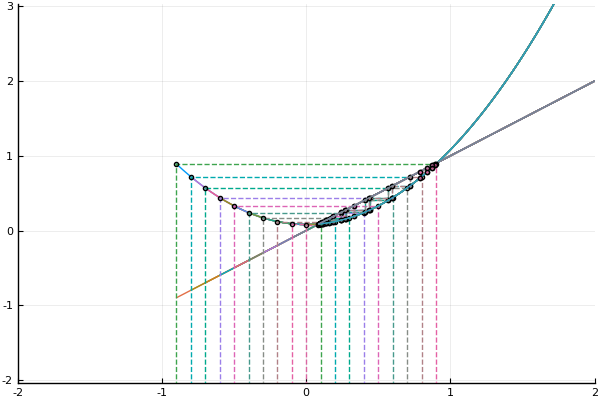

In [46]:
p = grafica_mapeo(no_div[1], 1:10, legend=false)
for m in no_div[2:end]
    grafica_mapeo!(m, 1:10)
end
p
xlims!(-2, 2)

Para verificar que en efecto no escapan, demos aún más pasos.

In [47]:
mapeos = [Mapeo(qc1, x0, 50) for x0 in rango];
no_div = mapeos[[!m.div for m in mapeos]];

In [48]:
for m in mapeos
    println("x0=$(m.x₀), div=$(m.div)")
end

x0=-2.0, div=true
x0=-1.9, div=true
x0=-1.8, div=true
x0=-1.7, div=true
x0=-1.6, div=true
x0=-1.5, div=true
x0=-1.4, div=true
x0=-1.3, div=true
x0=-1.2, div=true
x0=-1.1, div=true
x0=-1.0, div=true
x0=-0.9, div=false
x0=-0.8, div=false
x0=-0.7, div=false
x0=-0.6, div=false
x0=-0.5, div=false
x0=-0.4, div=false
x0=-0.3, div=false
x0=-0.2, div=false
x0=-0.1, div=false
x0=0.0, div=false
x0=0.1, div=false
x0=0.2, div=false
x0=0.3, div=false
x0=0.4, div=false
x0=0.5, div=false
x0=0.6, div=false
x0=0.7, div=false
x0=0.8, div=false
x0=0.9, div=false
x0=1.0, div=true
x0=1.1, div=true
x0=1.2, div=true
x0=1.3, div=true
x0=1.4, div=true
x0=1.5, div=true
x0=1.6, div=true
x0=1.7, div=true
x0=1.8, div=true
x0=1.9, div=true
x0=2.0, div=true


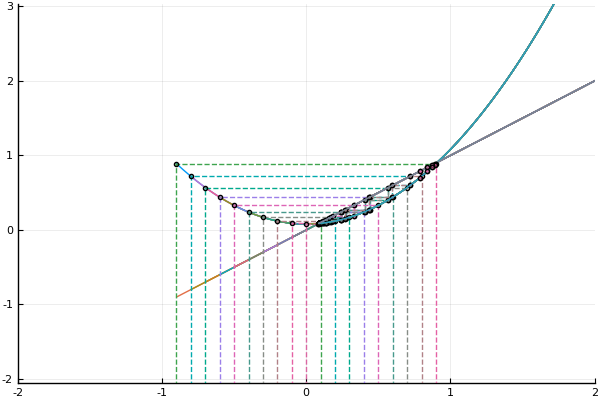

In [49]:
p = grafica_mapeo(no_div[1], 1:10, legend=false)
for m in no_div[2:end]
    grafica_mapeo!(m, 1:10)
end
p
xlims!(-2, 2)

En efecto, no escapan, de modo que el intervalo de confinamiento es ...

## 2

- Obtengan el diagrama de bifurcación que se muestra en la Fig. 2 del mapeo $Q_c(x)$ a partir de la iteración de una condición inicial.

- Caractericen la cuenca de atracción de $p_-(c)$ cuando el punto es estable.


Para obtener numéricamente el diagrama de bifurcación será necesario variar el parámetro $c$ y ver a dónde converge el mapeo dada una condición inicial $x_0$, este punto lo tomaremos como alguno que hayamos encontrado en el ejericio anterior.

In [50]:
x0 = 0; # Por simplicidad tomemos el 0

In [51]:
# Ahora un rango en c
# Sabemos que ha de cumplir c < 1/4, entonces
rango_c = -5:0.05:1/4
Fs = [x -> Qc(x, c) for c in rango_c]; # Un arreglo con distintas funciones para distintas c

In [52]:
mapeos = [Mapeo(f, x0, 100) for f in Fs];

In [53]:
mask = [!m.div for m in mapeos] ;# esto es un vector de true donde son convergentes

In [54]:
no_div = mapeos[mask]
rango_c_nodiv = rango_c[mask];

In [55]:
c_estables = [c for c in rango_c_nodiv];

In [56]:
c_estables = []
δ = 0.001 # Hay que tomar una delta, puesto que no siempre se va a estar "justo" en el punto
for (i, m) in enumerate(no_div)
    abs(m.xnn[end] - p₋(rango_c_nodiv[i])) < δ ? push!(c_estables, rango_c_nodiv[i]): nothing
end

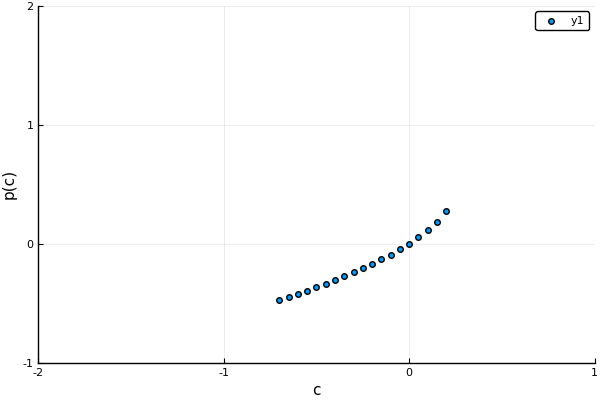

In [57]:
scatter(c_estables, p₋, xlabel="c", ylabel="p(c)")
xlims!(-2, 1); ylims!(-1, 2)

## 3

Para el mapeo $F_\lambda(x) = \lambda x(1-x)$, ¿qué podemos decir de la bifurcación que ocurre en $\lambda_0=1$? ¿Es o no una bifurcación de silla-nodo?

In [58]:
Fₗ(λ, x) = λ * x * (1 - x)

Fₗ (generic function with 1 method)

In [59]:
λ₀ = 1
f1 = x -> Fₗ(λ₀, x)

(::#51) (generic function with 1 method)

Para este mapeo se ha de cumplir que su gráfica es tangente a la diagonal en $x_0$, veamos si es así.

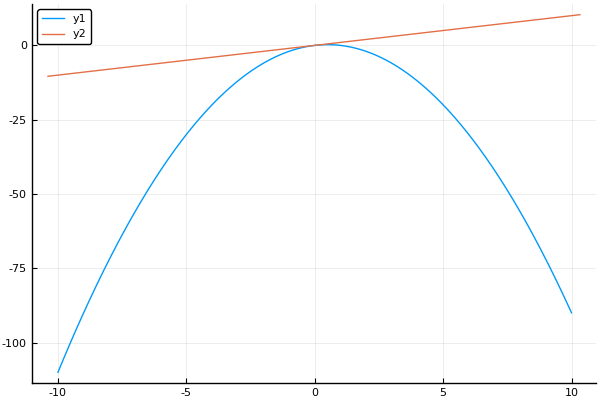

In [60]:
plot(-10:0.02:10, f1)
plot!(x->x)

Matemáticamente se tiene que cumplir la igualdad
$$
F_{\lambda_0}(x)=x-x^2=x\\
\Rightarrow -x^2=0\Rightarrow x=0
$$

Veamos que hace este punto.

In [61]:
x0 = 0 + rand()
mapeo = Mapeo(f1, x0, 20);

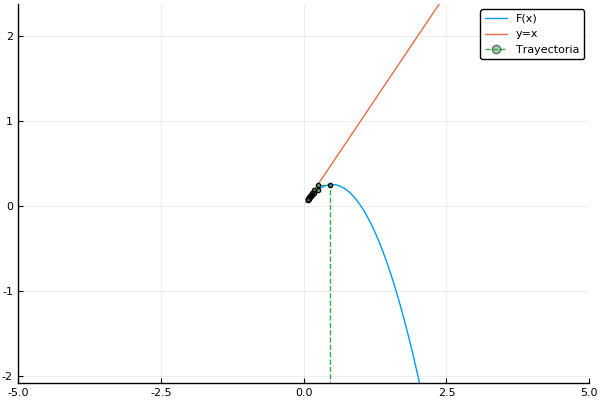

In [62]:
grafica_mapeo(mapeo, 1:20)
xlims!(-5,5)

Tal parece que el punto neutral atrae.

## 4

- Obtengan numéricamente el diagrama de bifurcación del mapeo $Q_c(x)$ a partir de la iteración de una condición inicial en el intervalo de parámetros $-2<c<1/4$. Para esto se necesita iterar un gran número de veces (hasta llegar al ciclo periódico) condiciones iniciales, y repetir esto para *muchos* valores de $c$ en el intervalo. Vale la pena hacer notar que, si hay ciclos periódicos, *a priori* no conocen su periodicidad.

- Para ciertos valores de $c$ característicos, muestren el análisis gráfico del mapeo $Q_c(x)$ a fin de entender los resultados.


In [63]:
rango_c = -2:0.001:1/4
Fs = [x -> Qc(x, c) for c in rango_c];

In [64]:
srand(42)
x₀ = rand(-2:0.001:1/4)
mapeos = [Mapeo(F, x₀, 1000) for F in Fs];

In [70]:
ps = [m.xnn[end-100:end] for m in mapeos];

2251-element Array{Array{Float64,1},1}:
 [-1.99808, 1.99233, 1.96938, 1.87847, 1.52865, 0.336782, -1.88658, 1.55918, 0.43103, -1.81421  …  -1.32044, -0.256433, -1.93424, 1.74129, 1.0321, -0.934766, -1.12621, -0.731646, -1.46469, 0.145329]    
 [-0.000936071, -1.999, 1.997, 1.989, 1.95712, 1.83131, 1.35469, -0.163827, -1.97216, 1.89042  …  -1.1904, -0.581945, -1.66034, 0.757728, -1.42485, 0.0311921, -1.99803, 1.99311, 1.9735, 1.89569]        
 [1.63073, 0.661272, -1.56072, 0.437846, -1.80629, 1.26469, -0.398565, -1.83915, 1.38446, -0.0812804  …  1.29458, -0.32205, -1.89428, 1.59031, 0.53109, -1.71594, 0.946461, -1.10221, -0.783132, -1.38471]
 [1.08338, -0.823283, -1.3192, -0.2567, -1.93111, 1.73217, 1.0034, -0.990182, -1.01654, -0.963648  …  1.08155, -0.827248, -1.31266, -0.273924, -1.92197, 1.69695, 0.882648, -1.21793, -0.51364, -1.73317] 
 [-1.75978, 1.10081, -0.784217, -1.381, -0.0888294, -1.98811, 1.95658, 1.8322, 1.36096, -0.143793  …  1.98401, 1.94031, 1.76879, 1.13263, -0.71315, 

In [31]:
scatter(rango_c, mapeos)

LoadError: [91mNo user recipe defined for Float64[39m

## 5

El objetivo de este ejercicio es relacionar, la velocidad de convergencia con que un punto fijo (o una órbita periódica, en el caso de los dos últimos incisos) atraen a puntos suficientemente cercanos, con la derivada del mapeo en el punto fijo (o ciclo periódico). La idea es, entonces, calcular primero el punto fijo y, después, medir cómo la distancia de los iterados sucesivos (de una condición inicial $x_0$) al punto fijo se comporta en el tiempo, para los siguientes mapeos:

- $F(x) = x^2+0.25$

- $F(x) = 3x(1-x)$

- $F(x) = \exp(x-1)$

- $F(x) = x^2 - 1.25$

- $F(x) = \exp(x+1)$

Deberán resolver algunas cosas intermedias. Por ejemplo, ¿qué tanto deben acercarse al punto fijo, a fin de evitar ruido numérico? ¿Qué hay que hacer en el caso en que el punto tenga una estabilidad neutra, i.e., no sea no atractivo ni repulsivo?

En los dos últimos incisos, el interés está en los ciclos de periodo 2.